# Import Library

In [64]:
!pip install tensorflow
!pip install Sastrawi

In [65]:
# Import pustaka umum
import pandas as pd
import csv
import numpy as np
import re
import string
import requests
from io import StringIO

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import pustaka Sastrawi untuk Bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Pustaka NLTK (Natural Language Toolkit)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')

# Import dari scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

# Import dari TensorFlow dan Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, Dense, Dropout, Flatten, SpatialDropout1D
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Data

In [66]:
# Load dataset
ulasan_shopee_df = pd.read_csv('ulasan_shopee.csv')
# Periksa 5 baris pertama dari dataset
ulasan_shopee_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,02c05947-ec51-468e-9579-a0a2e6e9b81f,Syariphudayatulloh Syariphidayatulloh,https://play-lh.googleusercontent.com/a/ACg8oc...,Semakin mudah untuk berbelanja,4,0,3.47.39,2025-04-09 14:10:59,"Hai kak Syariphudayatulloh Syariphidayatulloh,...",2025-04-09 15:07:05,3.47.39
1,534e648a-a283-4062-a0a3-89895259b1d5,Nuryadin Y,https://play-lh.googleusercontent.com/a/ACg8oc...,sudah terlalu sering kendala paket lama setiap...,1,0,NaN,2025-04-09 14:10:01,"Hai kak Nuryadin Y, maaf kakak jadi ngga nyama...",2025-04-09 15:09:08,NaN
2,4891b9b4-f70b-44d1-becd-192e834f2030,tengku sudirman,https://play-lh.googleusercontent.com/a/ACg8oc...,Mantap selalu di hati memang shopee tiada duan...,5,0,3.47.39,2025-04-09 14:09:28,"Hai kak , thanks ya bintang dan ulasannya. Aku...",2024-12-06 03:11:42,3.47.39
3,0f8c9b67-8c65-4517-b61f-ea0f91a5a1ea,Yoga Prima,https://play-lh.googleusercontent.com/a-/ALV-U...,"JELEK, PENGIRIMAN LAMA GA NGOTAK SAMA SEKALI. ...",1,0,3.47.39,2025-04-09 14:08:49,"Hai kak Yoga Prima, maaf kakak jadi ngga nyama...",2025-04-09 15:08:28,3.47.39
4,d7a74514-203d-443a-ae0e-c6cc36a636b0,Hakim Ndalijo,https://play-lh.googleusercontent.com/a/ACg8oc...,sekarang shoope lemot bgt,2,0,NaN,2025-04-09 14:07:25,"Hallo kak Hakim Ndalijo, maaf ya untuk kendala...",2025-04-09 15:07:37,NaN


In [67]:
# Menampilkan informasi tentang DataFrame app_reviews_df
ulasan_shopee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8008 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          8417 non-null   object
 9   repliedAt             8417 non-null   object
 10  appVersion            8008 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


In [68]:
ulasan_shopee_df.shape

(10000, 11)

# Cleaning & Pre-processing

In [69]:
# Drop data dengan missing values
data_clean_shopee_df = ulasan_shopee_df.dropna()

# Memeriksa duplikasi data
print("Jumlah data duplikat:", ulasan_shopee_df.duplicated().sum())

data_clean_shopee_df.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6701 non-null   object
 1   userName              6701 non-null   object
 2   userImage             6701 non-null   object
 3   content               6701 non-null   object
 4   score                 6701 non-null   int64 
 5   thumbsUpCount         6701 non-null   int64 
 6   reviewCreatedVersion  6701 non-null   object
 7   at                    6701 non-null   object
 8   replyContent          6701 non-null   object
 9   repliedAt             6701 non-null   object
 10  appVersion            6701 non-null   object
dtypes: int64(2), object(9)
memory usage: 628.2+ KB


In [70]:
# Cleaning Text
def Clean_Text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

In [71]:
# Mengubah huruf besar menjadi huruf kecil
def Case_Folding_Text(text):
    text = text.lower()
    return text

In [72]:
# Memecah teks menjadi token
def Tokenizing_Text(text):
    text = word_tokenize(text)
    return text

In [73]:
# Menghapus stopwords dalam teks
def Filtering_Text(text):
    list_Stopwords = set(stopwords.words('indonesian'))
    list_Stopwords1 = set(stopwords.words('english'))
    list_Stopwords.update(list_Stopwords1)
    list_Stopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in list_Stopwords:
            filtered.append(txt)
    text = filtered
    return text

In [74]:
# Mengembalikan kata kebentuk dasarnya dengan menghilangkan kata imbuhan
def stemmingText(text):
    # Membuat objek stemmer
    factory = Stemmer_Factory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

In [75]:
# Mengubah daftar kata menjadi kalimat
def to_Sentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [76]:
slangwords = {
    "mksd": "maksud",
    "brg": "barang",
    "brgnya": "barangnya",
    "dpt": "dapat",
    "dtg": "datang",
    "cepet": "cepat",
    "cepattt": "cepat",
    "lambret": "lambat",
    "rekomen": "rekomendasi",
    "rekomen banget": "sangat direkomendasikan",
    "seller": "penjual",
    "sller": "penjual",
    "tokonya": "toko nya",
    "murce": "murah",
    "murmer": "murah",
    "mantul": "mantap betul",
    "bagusss": "bagus",
    "oke": "baik",
    "okeee": "baik",
    "respon": "tanggapan",
    "responnya": "tanggapannya",
    "reseller": "penjual ulang",
    "parahh": "parah",
    "jelek": "buruk",
    "bagus": "baik",
    "keren": "hebat",
    "cpt": "cepat",
    "cpt bgt": "sangat cepat",
    "top": "hebat",
    "terbaikk": "terbaik",
    "terimakasih": "terima kasih",
    "mksh": "terima kasih",
    "makasih": "terima kasih",
    "thanks": "terima kasih",
    "wkwk": "",
    "haha": "",
    "hehe": "",
    "lol": "",
    "hehehe": "",
    "hadehh": "",
    "huhu": ""
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [77]:
# Fungsi untuk normalisasi slang words
def normalisasi_slangwords(text, slangwords):
    words = text.split()
    normalisasi_words = [slangwords[word.lower()] if word.lower() in slangwords else word for word in words]
    return ' '.join(normalisasi_words)

In [78]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_clean_shopee_df['text_clean'] = data_clean_shopee_df['content'].apply(Clean_Text)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data_clean_shopee_df['text_casefoldingText'] = data_clean_shopee_df['text_clean'].apply(Case_Folding_Text)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_clean_shopee_df['text_slangwords'] = data_clean_shopee_df['text_casefoldingText'].apply(lambda x: normalisasi_slangwords(x, slangwords))

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_clean_shopee_df['text_tokenizingText'] = data_clean_shopee_df['text_slangwords'].apply(Tokenizing_Text)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data_clean_shopee_df['text_stopword'] = data_clean_shopee_df['text_tokenizingText'].apply(Filtering_Text)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
data_clean_shopee_df['text_akhir'] = data_clean_shopee_df['text_stopword'].apply(to_Sentence)

<ipython-input-78-65f0d0ac342b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_shopee_df['text_clean'] = data_clean_shopee_df['content'].apply(Clean_Text)
<ipython-input-78-65f0d0ac342b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_shopee_df['text_casefoldingText'] = data_clean_shopee_df['text_clean'].apply(Case_Folding_Text)
<ipython-input-78-65f0d0ac342b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [79]:
data_clean_shopee_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,02c05947-ec51-468e-9579-a0a2e6e9b81f,Syariphudayatulloh Syariphidayatulloh,https://play-lh.googleusercontent.com/a/ACg8oc...,Semakin mudah untuk berbelanja,4,0,3.47.39,2025-04-09 14:10:59,"Hai kak Syariphudayatulloh Syariphidayatulloh,...",2025-04-09 15:07:05,3.47.39,Semakin mudah untuk berbelanja,semakin mudah untuk berbelanja,semakin mudah untuk berbelanja,"[semakin, mudah, untuk, berbelanja]","[mudah, berbelanja]",mudah berbelanja
2,4891b9b4-f70b-44d1-becd-192e834f2030,tengku sudirman,https://play-lh.googleusercontent.com/a/ACg8oc...,Mantap selalu di hati memang shopee tiada duan...,5,0,3.47.39,2025-04-09 14:09:28,"Hai kak , thanks ya bintang dan ulasannya. Aku...",2024-12-06 03:11:42,3.47.39,Mantap selalu di hati memang shopee tiada duan...,mantap selalu di hati memang shopee tiada duan...,mantap selalu di hati memang shopee tiada duan...,"[mantap, selalu, di, hati, memang, shopee, tia...","[mantap, hati, shopee, tiada, duanya, belanja,...",mantap hati shopee tiada duanya belanja shopii...
3,0f8c9b67-8c65-4517-b61f-ea0f91a5a1ea,Yoga Prima,https://play-lh.googleusercontent.com/a-/ALV-U...,"JELEK, PENGIRIMAN LAMA GA NGOTAK SAMA SEKALI. ...",1,0,3.47.39,2025-04-09 14:08:49,"Hai kak Yoga Prima, maaf kakak jadi ngga nyama...",2025-04-09 15:08:28,3.47.39,JELEK PENGIRIMAN LAMA GA NGOTAK SAMA SEKALI MA...,jelek pengiriman lama ga ngotak sama sekali ma...,buruk pengiriman lama ga ngotak sama sekali ma...,"[buruk, pengiriman, lama, ga, ngotak, sama, se...","[buruk, pengiriman, ngotak, kesini, lelet, pen...",buruk pengiriman ngotak kesini lelet pengirima...
5,38b0cbcf-d1e5-4323-a45f-1a21aa6bfb26,Teguh Prajitno Prajitno,https://play-lh.googleusercontent.com/a/ACg8oc...,Prosesnya cepat dan pengirimannya tepat,5,0,2.81.08,2025-04-09 14:07:22,hai kak Teguh .. makasih ya untuk bintang 5 da...,2025-04-09 15:19:12,2.81.08,Prosesnya cepat dan pengirimannya tepat,prosesnya cepat dan pengirimannya tepat,prosesnya cepat dan pengirimannya tepat,"[prosesnya, cepat, dan, pengirimannya, tepat]","[prosesnya, cepat, pengirimannya]",prosesnya cepat pengirimannya
8,8bf079a6-4883-455c-aaa7-fe8f607d6b24,Abdullah Fakih,https://play-lh.googleusercontent.com/a/ACg8oc...,saya suka shopee,5,0,3.46.37,2025-04-09 14:04:39,hai kak Abdullah .. makasih ya untuk bintang 5...,2025-04-09 15:25:50,3.46.37,saya suka shopee,saya suka shopee,saya suka shopee,"[saya, suka, shopee]","[suka, shopee]",suka shopee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,a753eaad-afce-4b1c-a97d-f5a3ad72bd67,nah_ barr26,https://play-lh.googleusercontent.com/a/ACg8oc...,yaa bagus,5,0,3.46.37,2025-04-04 05:04:54,Hai kak nah_ barr26. Makasih buat review dan b...,2025-04-04 06:45:19,3.46.37,yaa bagus,yaa bagus,yaa baik,"[yaa, baik]",[],
9995,c989f74d-726c-4193-9baf-ff61c5f3a357,Adinda Pratiwi,https://play-lh.googleusercontent.com/a-/ALV-U...,semenjak ada shopee hidupku berwarna :),5,0,3.46.37,2025-04-04 05:04:39,Hai kak Adinda Pratiwi. Makasih banyak ya udah...,2025-04-04 06:44:29,3.46.37,semenjak ada shopee hidupku berwarna,semenjak ada shopee hidupku berwarna,semenjak ada shopee hidupku berwarna,"[semenjak, ada, shopee, hidupku, berwarna]","[semenjak, shopee, hidupku, berwarna]",semenjak shopee hidupku berwarna
9996,5ce96df0-89e4-4766-aff7-4fed57b273b6,Yusup Saputra,https://play-lh.googleusercontent.com/a/ACg8oc...,sangat memudahkan sekali dan cukup puas,5,0,3.45.60,2025-04-04 05:04:22,"Waah thank you kak Yusup Saputra, seneng bisa ...",2025-04-04 06:43:18,3.45.60,sangat memudahkan sekali dan cukup puas,sangat memudahkan sekali dan cukup puas,sangat memudahkan sekali dan cukup puas,"[sangat, memudahkan, sekali, dan, cukup, puas]","[memudahkan, puas]",memudahkan puas
9998,1e30d79b-830b-42d7-bcca-67996b092fa1,Eko Munir,https://play-lh.googleusercontent.com

In [80]:
# Fungsi untuk mendapatkan data lexicon
def get_lexicon_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        lexicon = {line.strip() for line in response.text.splitlines() if line.strip()}
        return lexicon
    except requests.exceptions.RequestException as error:
        print(f"Error accessing {url}: {error}")
        return set()

# URLs for positive and negative lexicons
positive_url = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt"
negative_url = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt"

# Fetch positive and negative lexicons
positive_words = get_lexicon_data(positive_url)
negative_words = get_lexicon_data(negative_url)

# Display statistics
print(f"Jumlah Kata Positif: {len(positive_words)}")
print(f"Jumlah Kata Negatif: {len(negative_words)}")

Jumlah Kata Positif: 1182
Jumlah Kata Negatif: 2402


In [81]:
# Fungsi untuk menentukan polaritas sentimen dari ulasan
def sentiment_analysis(text):
    positive_count = 0
    negative_count = 0

    for word in text:
        if (word in positive_words):
            positive_count += 1
        elif word in negative_words:
            negative_count += 1

# Menentukan skor sentimen
    sentiment_score = positive_count - negative_count

    # Menentukan label sentimen
    if sentiment_score > 0:
        sentiment_label = 'positif'
    elif sentiment_score < 0:
        sentiment_label = 'negatif'
    else:
        sentiment_label = 'netral'

    return sentiment_score, sentiment_label

# Apply Sentimen
def apply_sentiment_analysis(text_column):
    sentiment_scores = []
    sentiment_labels = []

    for text in text_column:
        # Pastikan text sudah dalam bentuk token
        if isinstance(text, str):
            text = text.split()  # Tokenisasi jika diperlukan
        score, label = sentiment_analysis(text)
        sentiment_scores.append(score)
        sentiment_labels.append(label)

    return sentiment_scores, sentiment_labels

#Menerapkan analisis sentimen
scores, labels = apply_sentiment_analysis(data_clean_shopee_df['text_stopword'])

# Menambahkan hasil ke DataFrame
data_clean_shopee_df['sentiment_score'] = scores
data_clean_shopee_df['label'] = labels

# Menghitung jumlah sentimen
sentiment_counts = data_clean_shopee_df['label'].value_counts()
print(sentiment_counts)

label
netral     3412
positif    2657
negatif     632
Name: count, dtype: int64


<ipython-input-81-c37f2e47c888>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_shopee_df['sentiment_score'] = scores
<ipython-input-81-c37f2e47c888>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_shopee_df['label'] = labels


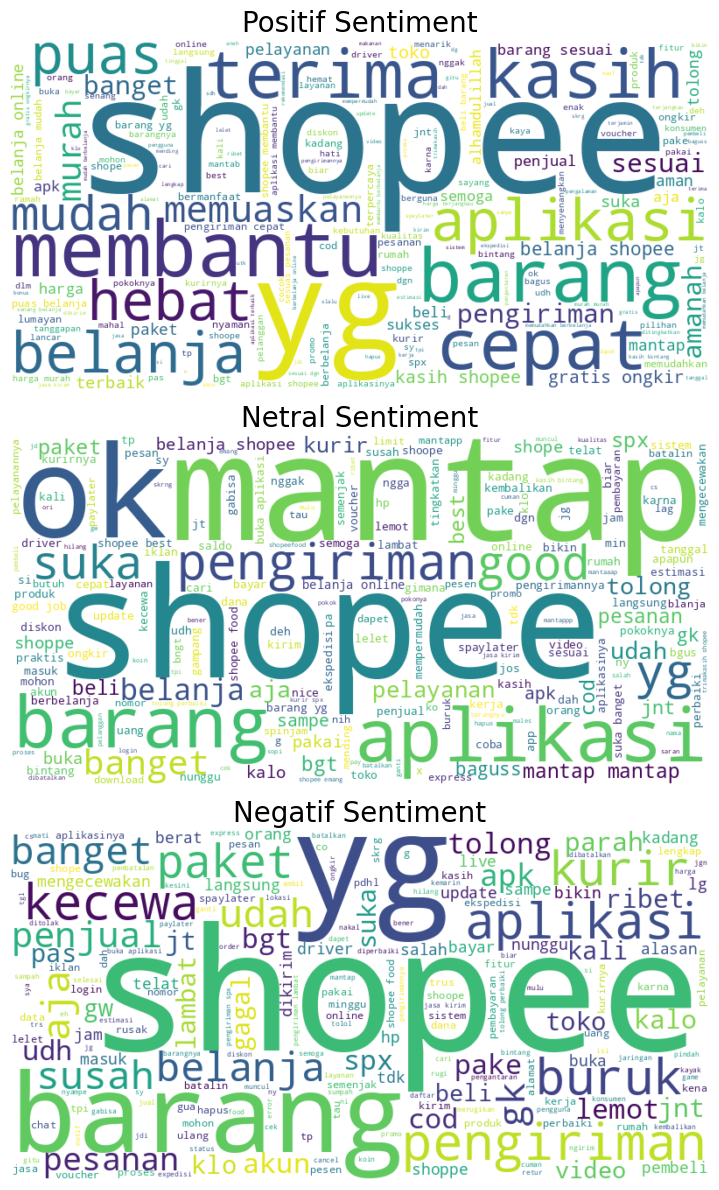

In [82]:
# Visualisasi WordCloud berdasarkan sentimen
# Daftar label sentimen dan warna judul
sentiments = ['positif', 'netral', 'negatif']
titles = ['Positif Sentiment', 'Netral Sentiment', 'Negatif Sentiment']

# Ukuran figure
plt.figure(figsize=(10, 12))

for i, sentiment in enumerate(sentiments):
    # Filter data berdasarkan sentimen
    filtered_df = data_clean_shopee_df[data_clean_shopee_df['label'] == sentiment]
    text = ' '.join(filtered_df['text_akhir'].dropna())

    # Buat wordcloud jika ada teks
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Plot dalam subplot
        plt.subplot(3, 1, i+1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titles[i], fontsize=20)
    else:
        print(f"Tidak ada data untuk sentimen: {sentiment}")

plt.tight_layout()
plt.show()

<ipython-input-83-601575b6fa71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  class_dist_plot = sns.countplot(x='label', data=data_clean_shopee_df,


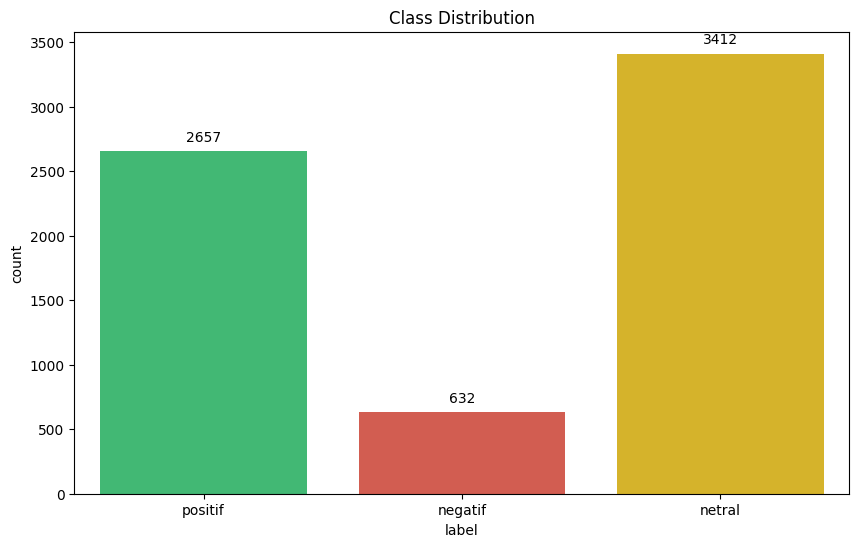

<ipython-input-83-601575b6fa71>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_shopee_df['text_length'] = data_clean_shopee_df['text_akhir'].apply(lambda x: len(x.split()))


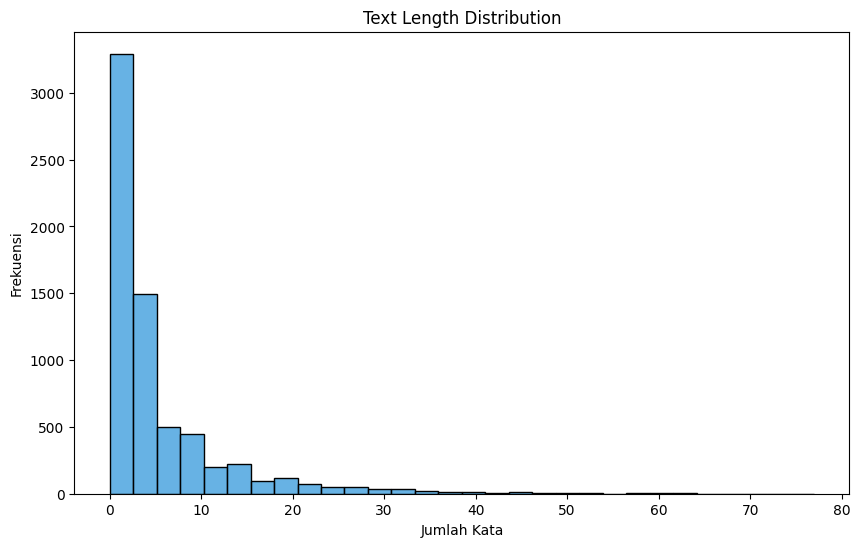

<ipython-input-83-601575b6fa71>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='magma')  # pakai colormap "magma"


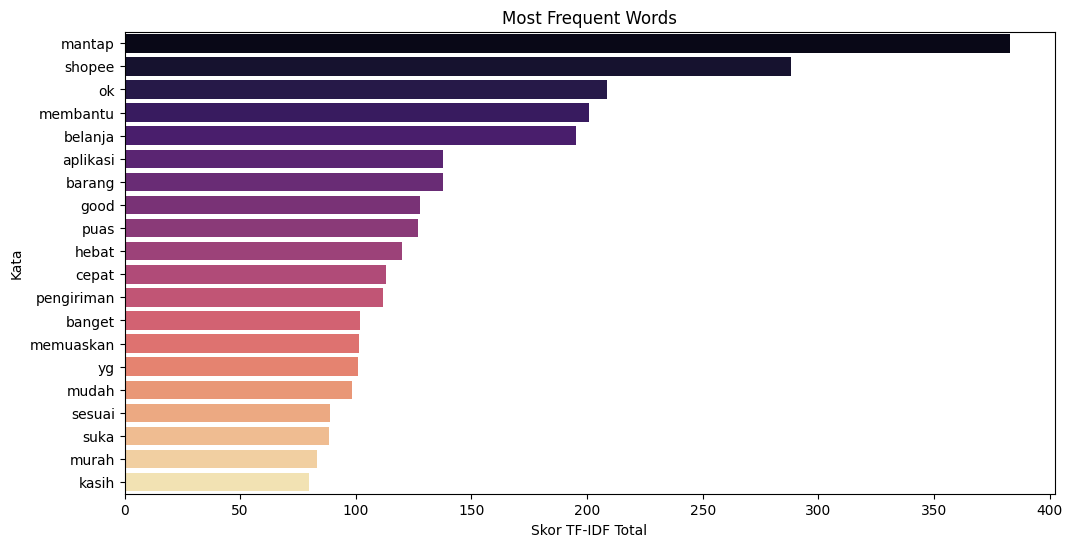

In [83]:
# Visualisasi Distribusi kelas
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='label', data=data_clean_shopee_df,
                                palette={'positif': '#2ecc71', 'netral': '#f1c40f', 'negatif': '#e74c3c'})  # warna custom
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')
plt.show()


# Visualisasi Distribusi panjang teks
plt.figure(figsize=(10, 6))
data_clean_shopee_df['text_length'] = data_clean_shopee_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(data_clean_shopee_df['text_length'], bins=30, color='#3498db')  # warna biru
plt.title('Text Length Distribution')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi Frekuensi kata terbanyak
plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_clean_shopee_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='magma')  # pakai colormap "magma"
plt.title('Most Frequent Words')
plt.xlabel('Skor TF-IDF Total')
plt.ylabel('Kata')
plt.show()

In [84]:
data_clean_shopee_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment_score,label,text_length
0,02c05947-ec51-468e-9579-a0a2e6e9b81f,Syariphudayatulloh Syariphidayatulloh,https://play-lh.googleusercontent.com/a/ACg8oc...,Semakin mudah untuk berbelanja,4,0,3.47.39,2025-04-09 14:10:59,"Hai kak Syariphudayatulloh Syariphidayatulloh,...",2025-04-09 15:07:05,3.47.39,Semakin mudah untuk berbelanja,semakin mudah untuk berbelanja,semakin mudah untuk berbelanja,"[semakin, mudah, untuk, berbelanja]","[mudah, berbelanja]",mudah berbelanja,1,positif,2
2,4891b9b4-f70b-44d1-becd-192e834f2030,tengku sudirman,https://play-lh.googleusercontent.com/a/ACg8oc...,Mantap selalu di hati memang shopee tiada duan...,5,0,3.47.39,2025-04-09 14:09:28,"Hai kak , thanks ya bintang dan ulasannya. Aku...",2024-12-06 03:11:42,3.47.39,Mantap selalu di hati memang shopee tiada duan...,mantap selalu di hati memang shopee tiada duan...,mantap selalu di hati memang shopee tiada duan...,"[mantap, selalu, di, hati, memang, shopee, tia...","[mantap, hati, shopee, tiada, duanya, belanja,...",mantap hati shopee tiada duanya belanja shopii...,1,positif,43
3,0f8c9b67-8c65-4517-b61f-ea0f91a5a1ea,Yoga Prima,https://play-lh.googleusercontent.com/a-/ALV-U...,"JELEK, PENGIRIMAN LAMA GA NGOTAK SAMA SEKALI. ...",1,0,3.47.39,2025-04-09 14:08:49,"Hai kak Yoga Prima, maaf kakak jadi ngga nyama...",2025-04-09 15:08:28,3.47.39,JELEK PENGIRIMAN LAMA GA NGOTAK SAMA SEKALI MA...,jelek pengiriman lama ga ngotak sama sekali ma...,buruk pengiriman lama ga ngotak sama sekali ma...,"[buruk, pengiriman, lama, ga, ngotak, sama, se...","[buruk, pengiriman, ngotak, kesini, lelet, pen...",buruk pengiriman ngotak kesini lelet pengirima...,-1,negatif,31
5,38b0cbcf-d1e5-4323-a45f-1a21aa6bfb26,Teguh Prajitno Prajitno,https://play-lh.googleusercontent.com/a/ACg8oc...,Prosesnya cepat dan pengirimannya tepat,5,0,2.81.08,2025-04-09 14:07:22,hai kak Teguh .. makasih ya untuk bintang 5 da...,2025-04-09 15:19:12,2.81.08,Prosesnya cepat dan pengirimannya tepat,prosesnya cepat dan pengirimannya tepat,prosesnya cepat dan pengirimannya tepat,"[prosesnya, cepat, dan, pengirimannya, tepat]","[prosesnya, cepat, pengirimannya]",prosesnya cepat pengirimannya,1,positif,3
8,8bf079a6-4883-455c-aaa7-fe8f607d6b24,Abdullah Fakih,https://play-lh.googleusercontent.com/a/ACg8oc...,saya suka shopee,5,0,3.46.37,2025-04-09 14:04:39,hai kak Abdullah .. makasih ya untuk bintang 5...,2025-04-09 15:25:50,3.46.37,saya suka shopee,saya suka shopee,saya suka shopee,"[saya, suka, shopee]","[suka, shopee]",suka shopee,0,netral,2


In [85]:
# Pisahkan data menjadi fitur dan label
X = data_clean_shopee_df['text_akhir']
y = data_clean_shopee_df['label']

# Modelling

# Model-1

In [86]:
# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data_clean_shopee_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(data_clean_shopee_df['text_akhir'])
X = pad_sequences(sequences, maxlen=100)

# Label encoding dan konversi ke one-hot
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(data_clean_shopee_df['label']))

# Membagi data menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Model LSTM
model1 = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    SpatialDropout1D(0.4),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(3, activation='softmax')
])
model1.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

# Training
model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),
           batch_size=64, verbose=1, callbacks=callbacks)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


74/74 ━━━━━━━━━━━━━━━━━━━━ 47s 505ms/step - accuracy: 0.5515 - loss: 0.8771 - val_accuracy: 0.7121 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 375ms/step - accuracy: 0.8024 - loss: 0.5088 - val_accuracy: 0.8364 - val_loss: 0.4070 - learning_rate: 0.0010
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.8920 - loss: 0.2958 - val_accuracy: 0.8637 - val_loss: 0.3423 - learning_rate: 0.0010
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 43s 393ms/step - accuracy: 0.9415 - loss: 0.1652 - val_accuracy: 0.8886 - val_loss: 0.3136 - learning_rate: 0.0010
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 377ms/step - accuracy: 0.9680 - loss: 0.1064 - val_accuracy: 0.8956 - val_loss: 0.3116 - learning_rate: 0.0010
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 404ms/step - accuracy: 0.9803 - loss: 0.0614 - val_accuracy: 0.8961 - val_loss: 0.3138 - learning_rate: 0.0010
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 366ms/step - accuracy: 0.9881 - loss: 0.0488 - val_

In [87]:
# Evaluasi
train_loss, train_acc = model1.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9806
Test Accuracy: 0.8956


# Model-2

In [88]:
# Ekstraksi Fitur TF-IDF Vectorization
tf_idf = TfidfVectorizer(max_features=10000)
X_tf_idf = tf_idf.fit_transform(data_clean_shopee_df['text_akhir'])

# Label encoding
le = LabelEncoder()
y = le.fit_transform(data_clean_shopee_df['label'])

# Membagi data menjadi 80:20
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.25, random_state=42, stratify=y)

# Training SVM model
model2 = LinearSVC()
model2.fit(X_train, y_train)

y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

In [89]:
# Evaluasi
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", round(train_acc, 4))
print("Testing Accuracy:", round(test_acc, 4))

Training Accuracy: 0.9954
Testing Accuracy: 0.9123


# Model-3

In [90]:
# Ekstraksi Fitur dengan BoW
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data_clean_shopee_df['text_akhir']).toarray()

# Encode label
le = LabelEncoder()
y = le.fit_transform(data_clean_shopee_df['label'])
y = to_categorical(y)

# Membagi data menjadi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model DNN
model3 = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Training
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6414 - loss: 0.9720 - val_accuracy: 0.8166 - val_loss: 0.4923
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8657 - loss: 0.3914 - val_accuracy: 0.8792 - val_loss: 0.3217
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9407 - loss: 0.1872 - val_accuracy: 0.8956 - val_loss: 0.2803
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9730 - loss: 0.0972 - val_accuracy: 0.9075 - val_loss: 0.2777
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9090 - val_loss: 0.2939
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9903 - loss: 0.0373 - val_accuracy: 0.9105 - val_loss: 0.3060
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9933 - loss: 0.0283 - val_accuracy: 0.9113 - val_loss: 0.3176
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9951 - loss: 0.0189 - val_accuracy: 0.9105 - v

In [91]:
# Evaluasi
train_loss, train_acc = model3.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9998
Test Accuracy: 0.9113


In [93]:
# Simpan hasil akurasi dari masing-masing Model
skema_data = {
    "Model": [
        "Model 1: Tokenizer + LSTM (80:20)",
        "Model 2: TF-IDF + SVM (70:30)",
        "Model 3: BoW + DNN (80:20)"
    ],
    "Akurasi Train": [
        0.9806,
        0.9954,
        0.9998
    ],
    "Akurasi Test": [
        0.8956,
        0.9123,
        0.9133
    ]
}

# Buat Perbandingan
df_perbandingan = pd.DataFrame(skema_data)

# Tampilkan Hasil
print("Perbandingan Akurasi Tiga Skema Pelatihan:")
display(df_perbandingan.sort_values(by='Akurasi Test', ascending=False))

Perbandingan Akurasi Tiga Skema Pelatihan:


,Model,Akurasi Train,Akurasi Test
2,Model 3: BoW + DNN (80:20),0.9998,0.9133
1,Model 2: TF-IDF + SVM (70:30),0.9954,0.9123
0,Model 1: Tokenizer + LSTM (80:20),0.9806,0.8956
